In [1]:
#set parameters for plot figure size

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)

In [2]:
# lib for reading and manipulate data
import pandas as pd
import numpy as np

# visual lib
import matplotlib.pyplot as plt
%matplotlib inline

# set seaborn theme
import seaborn as sns
sns.set_theme() # Calling this function with no arguments will activate seaborn’s “default” theme:

In [3]:
df = pd.read_csv(r'C:\Users\Igor\Desktop\Estudos\Python\Portifolio\GameSales\archive\vgsales.csv') #database

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.shape # (16598, 11) rows and columns

(16598, 11)

In [6]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
# Check missing data
df.isnull().sum().sort_values(ascending=False).head()

Year            271
Publisher        58
Global_Sales      0
Other_Sales       0
JP_Sales          0
dtype: int64

In [8]:
# Check duplication
len(df)-len(df.drop_duplicates())

0

In [9]:
# Drop NA-values in YEAR
df.dropna(subset=['Year'], inplace=True)

# Changing missing publishers name to 'Unknown'
df.loc[df['Publisher'].isna() == True, ['Publisher']] = 'Unknown'

# Fix year format / Note: year is listed as float but would be better to be listed as int
df['Year'] = df['Year'].apply(int)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16327.0,8292.868194,4792.669778,1.00,4136.50,8295.00,12441.50,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16327.0,0.265415,0.821591,0.00,0.00,0.08,0.24,41.49
EU_Sales,16327.0,0.147554,0.508766,0.00,0.00,0.02,0.11,29.02
JP_Sales,16327.0,0.078661,0.311557,0.00,0.00,0.00,0.04,10.22
Other_Sales,16327.0,0.048325,0.189885,0.00,0.00,0.01,0.04,10.57
Global_Sales,16327.0,0.540232,1.565732,0.01,0.06,0.17,0.48,82.74


In [11]:
# Categories list 

X = df # X = dataframe

for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique   categories".format(col_name=col_name, unique_cat=unique_cat))


Feature 'Name' has 11360 unique   categories
Feature 'Platform' has 31 unique   categories
Feature 'Genre' has 12 unique   categories
Feature 'Publisher' has 576 unique   categories


In [12]:
# Separating data into categorical and numerical

# Listing features categorical and numerical:
categorical_attributes = list(X.select_dtypes(include=['object']).columns)
numerical_attributes = list(X.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['Name', 'Platform', 'Genre', 'Publisher']
numerical_attributes: ['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [13]:
# Create a graph with sales per year by all industry
df_Year = df.groupby('Year').sum().reset_index(drop=False)
df_Year.head(5)

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,29826,10.59,0.67,0.00,0.12,11.38
1,1981,190488,33.40,1.96,0.00,0.32,35.77
2,1982,149186,26.92,1.65,0.00,0.31,28.86
3,1983,56759,7.76,0.80,8.10,0.14,16.79
4,1984,22911,33.28,2.10,14.27,0.70,50.36


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

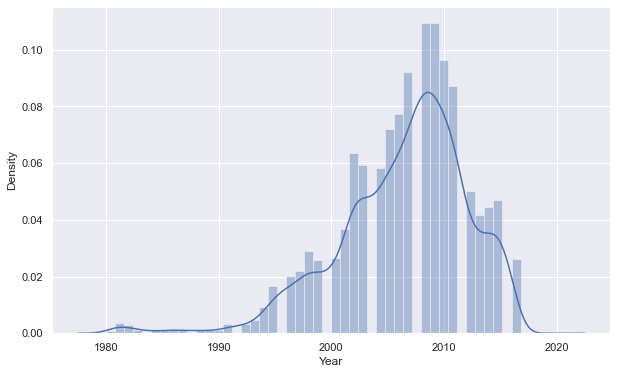

In [14]:
ax=plt.figure(figsize=(10,6))
sns.distplot(df['Year'])

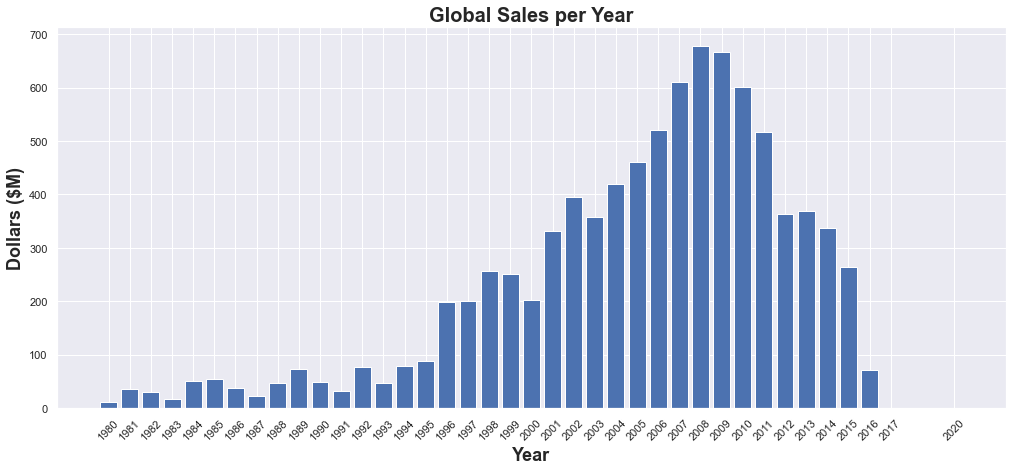

In [15]:
# Plot parameters 
figsize = [17, 7]
x = df_Year['Year']
y = df_Year['Global_Sales']
width = 0.8

# Bar chart
plt.figure(figsize=figsize)
bars = plt.bar(x, y, 
               width=width, 
               
               
              )

# Non-data objects
plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':20})    # A bit of hardcoding
plt.xlabel('Year', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Dollars ($M)', fontdict={'fontsize':18, 'fontweight':'bold'}, rotation='vertical')
plt.xticks(df_Year['Year'], rotation = 45)

plt.show()

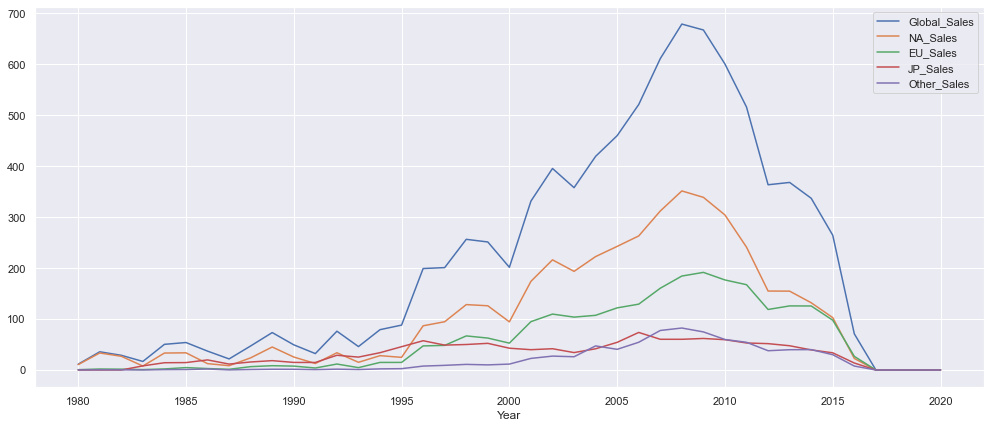

In [16]:
figsize = [17, 7]
Global_Sales_Yearly = df.groupby('Year')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
Global_Sales_Yearly.plot(figsize=figsize)
plt.show()

In [17]:
# Total Profit by Region
# Columns 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'

df_trim = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

#This part is dedicated to creating a properly dataframe with summed data
df_trim = df_trim.sum().reset_index()
df_trim = df_trim.rename(columns={"index": "Region", 0: "Sale"})
df_trim.columns
df_trim

,Region,Sale
0,NA_Sales,4333.43
1,EU_Sales,2409.12
2,JP_Sales,1284.30
3,Other_Sales,789.01


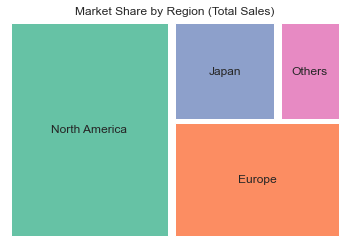

In [18]:
# Tree map of sales
# source: https://jingwen-z.github.io/data-viz-with-matplotlib-series5-treemap/
# source: https://www.analyticsvidhya.com/blog/2021/10/how-to-build-a-treemap-in-3-ways-using-python/
# source: https://www.analyticsvidhya.com/blog/2021/06/build-treemaps-in-python-using-squarify/
# source: https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

labels = ['North America','Europe','Japan','Others']
color = sns.color_palette("Set2")

import squarify

sns.set_style(style="whitegrid")
sizes = df_trim["Sale"].values      # proportions of the categories // sizes= df["values"].values# proportions of the categories
label = labels           # label = df_trim["Region"]                             

squarify.plot(sizes=sizes, label=label, alpha=1 , color=color, pad=True).set(title='Market Share by Region (Total Sales)')
plt.axis('off')
plt.show()

                                    #label = df_trim[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] #label=df["labels"]
                                    # How to put sales in legend?
                                    #squarify.plot(sizes=sizes, label=label, alpha=0.8 ,color=colors, pad=True).set(title='Total Sales by Region in Billions ($USD)')

In [19]:
# Most succesfull platforms (Sales)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [21]:
df_plat_sales = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Name']]
df_plat_sales = df_plat_sales.groupby('Platform').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
df_plat_sales

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PS2,572.92,332.63,137.54,190.47,1233.46
1,X360,594.33,278.01,12.30,84.67,969.61
2,PS3,388.90,340.47,79.21,140.81,949.35
3,Wii,497.37,264.35,68.28,79.20,909.81
4,DS,388.56,194.07,175.02,60.29,818.96
5,PS,334.71,212.38,139.78,40.69,727.39
6,GBA,184.12,74.59,46.56,7.61,313.56
7,PSP,107.09,67.16,75.89,41.52,291.71
8,PS4,96.80,123.70,14.30,43.36,278.10
9,PC,92.10,137.64,0.17,24.33,255.05


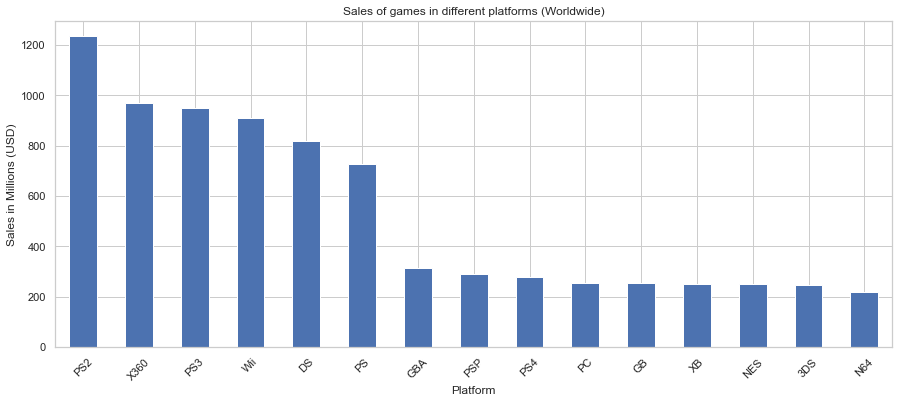

In [22]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(15).plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sales in Millions (USD)')
plt.title('Sales of games in different platforms (Worldwide)')

plt.show()

In [23]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

# Sales by decade

# 1980s Publishers

In [24]:
#Sales 1980s decade

Sales1980 = df.loc[(df['Year'] < 1990)].sort_values(by='Rank', ascending=True)
Sales1980

#Sales1980.hist(figsize=[15,10])
#Sales1980[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
21,22,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
22,23,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
...,...,...,...,...,...,...,...,...,...,...,...
11749,11751,Super Baseball,2600,1987,Sports,Atari,0.07,0.00,0.00,0.00,0.07
12636,12638,Adventures of Lolo,NES,1989,Puzzle,HAL Laboratory,0.06,0.00,0.00,0.00,0.06
14335,14338,Alter Ego,PC,1985,Simulation,Activision,0.00,0.03,0.00,0.01,0.03
14507,14510,SimCity,PC,1988,Simulation,Maxis,0.00,0.02,0.00,0.01,0.03


In [25]:
# Sorting data Global Sales grouped by Publisher

modplot1 = Sales1980[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Publisher').sum().reset_index(drop=False).sort_values(by='Global_Sales', ascending=False)
modplot1

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,Nintendo,140.27,23.61,66.58,4.43,234.92
3,Atari,38.49,2.35,0.00,0.42,41.30
1,Activision,17.19,1.05,0.00,0.20,18.41
22,Namco Bandai Games,2.74,0.59,12.94,0.10,16.37
8,Capcom,5.70,1.32,3.05,1.66,11.72
13,Hudson Soft,0.50,0.06,6.22,0.01,6.79
16,Konami Digital Entertainment,1.66,0.27,4.81,0.03,6.77
11,Enix Corporation,0.25,0.00,6.18,0.00,6.43
25,Parker Bros.,4.65,0.27,0.00,0.05,4.97
15,Imagic,4.51,0.27,0.00,0.04,4.82


In [26]:
#Groupby small companies to plot tree map of concentration (excluding Nintendo and Atari of the dataframe)

modplot2 = modplot1.loc[(modplot1['Publisher'] != "Nintendo") & (modplot1['Publisher'] != "Atari")].sort_values(by='Global_Sales', ascending=False)
modplot2

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Activision,17.19,1.05,0.00,0.20,18.41
22,Namco Bandai Games,2.74,0.59,12.94,0.10,16.37
8,Capcom,5.70,1.32,3.05,1.66,11.72
13,Hudson Soft,0.50,0.06,6.22,0.01,6.79
16,Konami Digital Entertainment,1.66,0.27,4.81,0.03,6.77
11,Enix Corporation,0.25,0.00,6.18,0.00,6.43
25,Parker Bros.,4.65,0.27,0.00,0.05,4.97
15,Imagic,4.51,0.27,0.00,0.04,4.82
24,Palcom,3.38,0.44,0.31,0.04,4.17
9,Coleco,2.87,0.17,0.00,0.03,3.06


In [27]:
# Changing smaller publishers name to 'Other Publishers' using isna() was the easiest way that i've found but there are other ways of changing

modplot2.loc[modplot2['Publisher'].isna() == False, ['Publisher']] = 'Other Publishers'
modplot2 = modplot2.groupby('Publisher').agg({'NA_Sales': 'sum', 'EU_Sales' : 'sum', 'JP_Sales' : 'sum', 'Other_Sales' : 'sum', 'Global_Sales' : sum}).reset_index(drop=False)
modplot2

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Other Publishers,56.9,5.24,35.91,2.28,100.36


In [28]:
#modplo1 consists of the two biggest companies 'Nintendo' and 'Atari'
modplot1 = modplot1.head(2)
modplot1

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,Nintendo,140.27,23.61,66.58,4.43,234.92
3,Atari,38.49,2.35,0.00,0.42,41.30


In [29]:
#Concatenate both dataframes for plotting modplot1 + modplot2

modplottree80 = pd.concat([modplot1, modplot2])
modplottree80 = modplottree80[['Publisher', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
modplottree80

,Publisher,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
23,Nintendo,234.92,140.27,23.61,66.58,4.43
3,Atari,41.30,38.49,2.35,0.00,0.42
0,Other Publishers,100.36,56.90,5.24,35.91,2.28


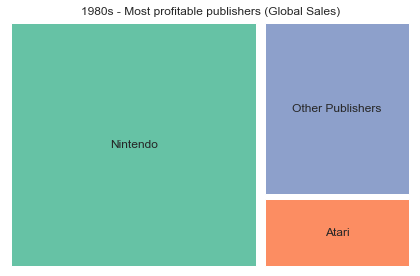

In [30]:
#Tree map of concentration market 1980s
#labels defined earlier
#sizes = Global_Sales
labels = modplottree80['Publisher']
color = sns.color_palette("Set2")

import squarify

sns.set_style(style="whitegrid")
sizes = modplottree80['Global_Sales'].values
label = labels                          

squarify.plot(sizes=sizes, label=label, alpha=1 , color=color, pad=True).set(title='1980s - Most profitable publishers (Global Sales)')
plt.axis('off')
plt.tight_layout()

# 1990s Publishers

In [31]:
Sales1990 = df.loc[(df['Year']>=1990) & (df['Year']<2000)].sort_values(by='Rank', ascending=True)
Sales1990

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
30,31,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
46,47,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
...,...,...,...,...,...,...,...,...,...,...,...
16379,16382,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.00,0.01,0.00,0.00,0.01
16436,16439,Worms 2,PC,1997,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01
16506,16509,Samurai Shodown: Warrios Rage,PS,1999,Fighting,SNK,0.01,0.00,0.00,0.00,0.01
16554,16557,Psychic Detective,PS,1995,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01


In [32]:
# Sorting data Global Sales grouped by Publisher

modplot3 = Sales1990[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Publisher').sum().reset_index(drop=False).sort_values(by='Global_Sales', ascending=False)
modplot3


,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
120,Nintendo,180.31,72.00,102.97,9.26,364.56
150,Sony Computer Entertainment,74.99,45.47,42.46,8.83,171.73
46,Electronic Arts,55.76,24.14,1.06,3.97,84.98
91,Konami Digital Entertainment,14.35,6.89,25.68,2.19,49.14
145,Sega,17.24,5.66,23.85,0.89,47.69
...,...,...,...,...,...,...
76,Imageworks,0.00,0.00,0.02,0.00,0.02
21,Athena,0.02,0.00,0.00,0.00,0.02
135,Quintet,0.00,0.00,0.02,0.00,0.02
43,EON Digital Entertainment,0.01,0.00,0.00,0.00,0.01


In [33]:
## Groupby small companies to plot tree map of concentration (excluding Nintendo and Atari of the dataframe)

modplot4 = modplot3.loc[(modplot3['Publisher'] != "Nintendo") &
                        (modplot3['Publisher'] != "Sony Computer Entertainment") &
                        (modplot3['Publisher'] != "Electronic Arts") &
                        (modplot3['Publisher'] != "Konami Digital Entertainment") &
                        (modplot3['Publisher'] != "Sega")].sort_values(by='Global_Sales', ascending=False)
modplot4

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
154,SquareSoft,8.30,3.81,32.46,1.35,45.90
45,Eidos Interactive,17.85,14.50,4.53,1.91,38.76
183,Virgin Interactive,15.97,10.85,6.96,2.45,36.21
6,Acclaim Entertainment,25.77,7.56,0.92,1.12,35.39
114,Namco Bandai Games,4.58,2.37,25.12,0.87,32.95
...,...,...,...,...,...,...
76,Imageworks,0.00,0.00,0.02,0.00,0.02
21,Athena,0.02,0.00,0.00,0.00,0.02
135,Quintet,0.00,0.00,0.02,0.00,0.02
43,EON Digital Entertainment,0.01,0.00,0.00,0.00,0.01


In [34]:
# Changing smaller publishers name to 'Other Publishers' using isna() was the easiest way that i've found but there are other ways of changing

modplot4.loc[modplot4['Publisher'].isna() == False, ['Publisher']] = 'Other Publishers'
modplot4 = modplot4.groupby('Publisher').agg({'NA_Sales': 'sum', 'EU_Sales' : 'sum', 'JP_Sales' : 'sum', 'Other_Sales' : 'sum', 'Global_Sales' : sum}).reset_index(drop=False)
modplot4

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Other Publishers,233.46,128.71,176.31,22.28,560.81


In [35]:
# modplot1 consists of the two biggest companies 'Nintendo' and 'Sony'
modplot3 = modplot3.head(5)
modplot3

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
120,Nintendo,180.31,72.00,102.97,9.26,364.56
150,Sony Computer Entertainment,74.99,45.47,42.46,8.83,171.73
46,Electronic Arts,55.76,24.14,1.06,3.97,84.98
91,Konami Digital Entertainment,14.35,6.89,25.68,2.19,49.14
145,Sega,17.24,5.66,23.85,0.89,47.69


In [36]:
# Changing Publishers Name 'Microsoft and Sony for better fitting when plotting'
modplot3.loc[modplot3['Publisher'] == "Konami Digital Entertainment", ['Publisher']] = 'Konami'
modplot3.loc[modplot3['Publisher'] == "Sony Computer Entertainment", ['Publisher']] = 'Sony'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [37]:
#Concatenate both dataframes for plotting modplot3 + modplot4
modplottree90 = pd.concat([modplot3, modplot4])
modplottree90 = modplottree90[['Publisher', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
modplottree90

,Publisher,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
120,Nintendo,364.56,180.31,72.00,102.97,9.26
150,Sony,171.73,74.99,45.47,42.46,8.83
46,Electronic Arts,84.98,55.76,24.14,1.06,3.97
91,Konami,49.14,14.35,6.89,25.68,2.19
145,Sega,47.69,17.24,5.66,23.85,0.89
0,Other Publishers,560.81,233.46,128.71,176.31,22.28


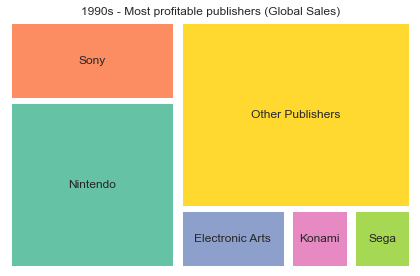

In [38]:
#Tree map of concentration market 1980s
#labels defined earlier
#sizes = Global_Sales

labels = modplottree90['Publisher']
color = sns.color_palette("Set2")

import squarify


sns.set_style(style="whitegrid")
sizes = modplottree90['Global_Sales'].values

label = labels                          

squarify.plot(sizes=sizes, label=label, alpha=1 , color=color, pad=True).set(title='1990s - Most profitable publishers (Global Sales)')
plt.axis('off')
plt.tight_layout()

In [39]:
# Plotly example
#import plotly.express as px
#fig = px.treemap(modplottree90, path=['Publisher'],values=sizes, width=700, height=700, title='1990s - Most profitable publisher (Global Sales)')
#fig.show()

# 2000s Publishers

In [40]:
Sales2000 = df.loc[(df['Year']>=2000) & (df['Year']<2010)].sort_values(by='Rank', ascending=True)
Sales2000

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16592,16595,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [41]:
# Sorting data Global Sales grouped by Publisher

modplot5 = Sales2000[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Publisher').sum().reset_index(drop=False).sort_values(by='Global_Sales', ascending=False)
modplot5 = modplot5
modplot5

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
215,Nintendo,382.49,241.82,196.90,62.50,883.89
87,Electronic Arts,372.75,189.90,8.90,75.84,647.49
13,Activision,236.93,102.97,1.91,39.42,381.45
270,Sony Computer Entertainment,137.98,96.42,24.56,52.27,311.21
295,THQ,163.19,73.48,2.57,25.55,264.80
...,...,...,...,...,...,...
104,G.Rev,0.00,0.00,0.01,0.00,0.01
59,Commseed,0.00,0.00,0.01,0.00,0.01
1,1C Company,0.00,0.01,0.00,0.00,0.01
212,Naxat Soft,0.00,0.00,0.01,0.00,0.01


In [42]:
## Groupby small companies to plot tree map of concentration (excluding Nintendo and Atari of the dataframe)

modplot6 = modplot5.loc[(modplot5['Publisher'] != "Nintendo") &
                        (modplot5['Publisher'] != "Electronic Arts") &
                        (modplot5['Publisher'] != "Activision") &
                        (modplot5['Publisher'] != "Sony Computer Entertainment") &
                        (modplot5['Publisher'] != "THQ")].sort_values(by='Global_Sales', ascending=False)
modplot6

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
312,Ubisoft,142.68,74.21,4.40,23.53,245.05
299,Take-Two Interactive,120.73,57.21,2.91,32.68,213.41
162,Konami Digital Entertainment,57.35,45.52,42.41,22.19,167.59
266,Sega,72.19,49.82,21.94,16.38,160.44
194,Microsoft Game Studios,74.43,31.99,2.06,8.21,116.73
...,...,...,...,...,...,...
184,Media Entertainment,0.00,0.00,0.01,0.00,0.01
143,Interchannel-Holon,0.00,0.00,0.01,0.00,0.01
116,Genterprise,0.00,0.00,0.01,0.00,0.01
294,TGL,0.00,0.00,0.01,0.00,0.01


In [43]:
# Changing smaller publishers name to 'Other Publishers' using isna() was the easiest way that i've found but there are other ways of changing

modplot6.loc[modplot6['Publisher'].isna() == False, ['Publisher']] = 'Other Publishers'
modplot6 = modplot6.groupby('Publisher').agg({'NA_Sales': 'sum', 'EU_Sales' : 'sum', 'JP_Sales' : 'sum', 'Other_Sales' : 'sum', 'Global_Sales' : sum}).reset_index(drop=False)
modplot6

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Other Publishers,1115.57,551.59,275.85,209.15,2155.18


In [44]:
# modplot5 consists of the 5 biggest companies
modplot5 = modplot5.head(5)
modplot5

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
215,Nintendo,382.49,241.82,196.90,62.50,883.89
87,Electronic Arts,372.75,189.90,8.90,75.84,647.49
13,Activision,236.93,102.97,1.91,39.42,381.45
270,Sony Computer Entertainment,137.98,96.42,24.56,52.27,311.21
295,THQ,163.19,73.48,2.57,25.55,264.80


In [45]:
# Changing Publishers Name for better fitting when plotting'

modplot5.loc[modplot5['Publisher'] == "Sony Computer Entertainment", ['Publisher']] = 'Sony'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [46]:
#Concatenate both dataframes for plotting modplot5 + modplot6
modplottree00 = pd.concat([modplot5, modplot6])
modplottree00 = modplottree00[['Publisher', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
modplottree00

,Publisher,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
215,Nintendo,883.89,382.49,241.82,196.90,62.50
87,Electronic Arts,647.49,372.75,189.90,8.90,75.84
13,Activision,381.45,236.93,102.97,1.91,39.42
270,Sony,311.21,137.98,96.42,24.56,52.27
295,THQ,264.80,163.19,73.48,2.57,25.55
0,Other Publishers,2155.18,1115.57,551.59,275.85,209.15


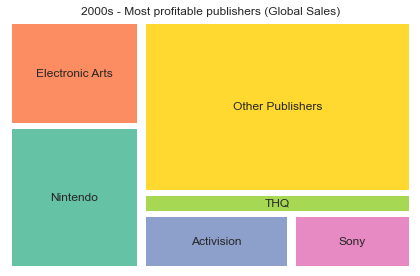

In [47]:
#Tree map of concentration market 1980s
#labels defined earlier
#sizes = Global_Sales

labels = modplottree00['Publisher']
color = sns.color_palette("Set2")

import squarify


sns.set_style(style="whitegrid")
sizes = modplottree00['Global_Sales'].values

label = labels                          

squarify.plot(sizes=sizes, label=label, alpha=1 , color=color, pad=True).set(title='2000s - Most profitable publishers (Global Sales)')
plt.axis('off')
plt.tight_layout()

# 2010s Publishers

In [48]:
Sales2010 = df.loc[(df['Year']>=2010) & (df['Year']<=2020)].sort_values(by='Rank', ascending=True)
Sales2010

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...,...
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011,Sports,Unknown,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,PC,2011,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01


In [49]:
# Sorting data Global Sales grouped by Publisher

modplot7 = Sales2010[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].groupby('Publisher').sum().reset_index(drop=False).sort_values(by='Global_Sales', ascending=False)
modplot7

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
66,Electronic Arts,155.71,153.34,4.02,47.82,360.92
163,Nintendo,112.68,80.87,88.54,19.00,301.06
8,Activision,158.25,99.09,4.19,33.97,295.65
240,Ubisoft,105.27,85.96,2.69,26.22,220.14
223,Take-Two Interactive,95.28,55.92,2.88,21.98,176.04
...,...,...,...,...,...,...
179,Piacci,0.00,0.00,0.01,0.00,0.01
239,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
177,Paradox Development,0.00,0.01,0.00,0.00,0.01
115,Inti Creates,0.00,0.00,0.01,0.00,0.01


In [50]:
## Groupby small companies to plot tree map of concentration (excluding Nintendo and Atari of the dataframe)

modplot8 = modplot7.loc[(modplot7['Publisher'] != "Electronic Arts") &
                        (modplot7['Publisher'] != "Nintendo") &
                        (modplot7['Publisher'] != "Activision") &
                        (modplot7['Publisher'] != "Ubisoft") &
                        (modplot7['Publisher'] != "Take-Two Interactive") &
                        (modplot7['Publisher'] != "Sony Computer Entertainment") &
                        (modplot7['Publisher'] != "Microsoft Game Studios") &
                        (modplot7['Publisher'] != "Warner Bros. Interactive Entertainment") &
                        (modplot7['Publisher'] != "Namco Bandai Games") &
                        (modplot7['Publisher'] != "Square Enix")].sort_values(by='Global_Sales', ascending=False)
modplot8

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,Bethesda Softworks,29.91,26.17,1.27,8.39,65.77
198,Sega,18.98,25.91,10.40,7.03,62.17
220,THQ,33.12,16.21,0.59,5.89,55.93
128,Konami Digital Entertainment,15.55,15.94,18.03,5.50,55.06
39,Capcom,15.55,10.86,22.04,3.77,52.24
...,...,...,...,...,...,...
35,Boost On,0.00,0.00,0.01,0.00,0.01
85,GN Software,0.00,0.00,0.01,0.00,0.01
20,Ascaron Entertainment,0.00,0.01,0.00,0.00,0.01
61,Dorart,0.00,0.00,0.01,0.00,0.01


In [51]:
# Changing smaller publishers name to 'Other Publishers' using isna() was the easiest way that i've found but there are other ways of changing

modplot8.loc[modplot8['Publisher'].isna() == False, ['Publisher']] = 'Other Publishers'
modplot8 = modplot8.groupby('Publisher').agg({'NA_Sales': 'sum', 'EU_Sales' : 'sum', 'JP_Sales' : 'sum', 'Other_Sales' : 'sum', 'Global_Sales' : sum}).reset_index(drop=False)
modplot8

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Other Publishers,249.99,196.63,122.25,62.58,631.94


In [52]:
# Changing Publishers Name 'Microsoft and Sony for better fitting when plotting'
modplot7.loc[modplot7['Publisher'] == "Microsoft Game Studios", ['Publisher']] = 'Microsoft'
modplot7.loc[modplot7['Publisher'] == "Sony Computer Entertainment", ['Publisher']] = 'Sony'
modplot7.loc[modplot7['Publisher'] == "Warner Bros. Interactive Entertainment", ['Publisher']] = 'Warners Bros'

In [53]:
modplot7 = modplot7.head(10) #setting the ten biggest companies only

In [54]:
#Concatenate both dataframes for plotting modplot5 + modplot6
modplottree10 = pd.concat([modplot7, modplot8])
modplottree10 = modplottree10[['Publisher', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
modplottree10

,Publisher,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
66,Electronic Arts,360.92,155.71,153.34,4.02,47.82
163,Nintendo,301.06,112.68,80.87,88.54,19.00
8,Activision,295.65,158.25,99.09,4.19,33.97
240,Ubisoft,220.14,105.27,85.96,2.69,26.22
223,Take-Two Interactive,176.04,95.28,55.92,2.88,21.98
204,Sony,124.34,52.25,45.66,7.08,19.30
149,Microsoft,123.84,77.69,34.85,1.20,10.13
251,Warners Bros,113.98,57.31,41.84,0.98,13.83
157,Namco Bandai Games,96.07,23.90,20.56,44.71,6.79
210,Square Enix,76.87,24.42,24.15,20.25,8.11


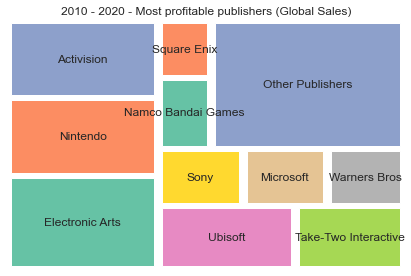

In [55]:
#Tree map of concentration market 1980s
#labels defined earlier
#sizes = Global_Sales

labels = modplottree10['Publisher']
color = sns.color_palette("Set2")

import squarify


sns.set_style(style="whitegrid")
sizes = modplottree10['Global_Sales'].values

label = labels                          

squarify.plot(sizes=sizes, label=label, alpha=1 , color=color, pad=True).set(title='2010 - 2020 - Most profitable publishers (Global Sales)')
plt.axis('off')
plt.tight_layout()

# How concentrated was the gaming industry by the decades?
**Colage of tree maps**

# Most popular genres

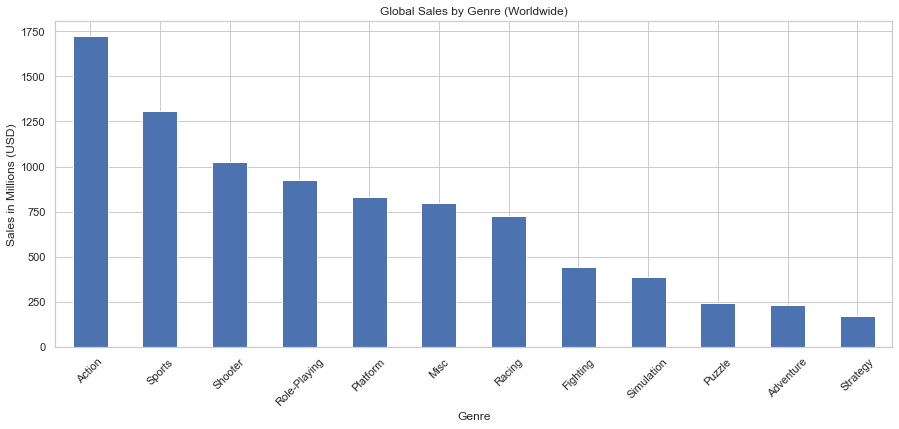

In [56]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(15).plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sales in Millions (USD)')
plt.title('Global Sales by Genre (Worldwide)')
sns.set_theme()
plt.grid(True)
plt.show()

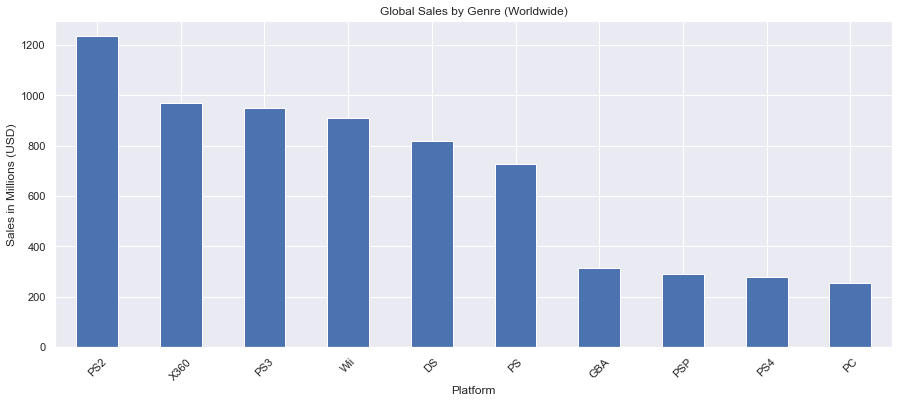

In [57]:
ax=plt.figure(figsize=(15,6))
df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False).head(10).plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Sales in Millions (USD)')
plt.title('Global Sales by Genre (Worldwide)')
sns.set_theme()
plt.grid(True)
plt.show()